<img src='https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/tools/frameworks/-/raw/main/img/Standard_banner.png' align='right' width='100%'/>

<a href="../../Index.ipynb"><< Index</a>
<br>
<a href="./README.ipynb" target="_blank"><< README</a>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<a href="./02_DINEOF_run_Py.ipynb" target="_blank">Run DINEOF >></a>

<font color="#138D75">**Copernicus Marine Training Service**</font> <br>
**Copyright:** 2023 EUMETSAT <br>
**License:** MIT <br>
**Authors:** Ben Loveday (EUMETSAT/Innoflair UG), Hayley Evers-King (EUMETSAT), Aida Alvera-Azcárate (GHER).

<div class="alert alert-block alert-success">
<h3>Liege Colloquium 2023</h3></div>

<div class="alert alert-block alert-warning">
    
<b>PREREQUISITES </b>
    
There are no prerequisite for this module.
</div>
<hr>

# 1. DINEOF: Preprocessing of data

In this script we will:

* Read initial data file
* Create land-sea mask
* Write results to a new file to be used in DINEOF

In [1]:
from netCDF4 import Dataset
import matplotlib.pyplot as plt

In [2]:
filename = "SST_MED_SST_L3S_NRT_OBSERVATIONS_010_012_a_example.nc"
ds = Dataset(filename, "r");
print(ds.variables.keys())

dict_keys(['sea_surface_temperature', 'time', 'lat', 'lon', 'source_of_sst'])


In [3]:
sst = ds.variables['sea_surface_temperature'][:]-273.15
lat = ds.variables['lat'][:]
lon = ds.variables['lon'][:]
time = ds.variables['time'][:]; #"seconds since 1981-01-01 00:00:00"

In [4]:
mt = ds.variables['time']
print(mt)

<class 'netCDF4._netCDF4.Variable'>
int32 time(time)
    long_name: reference time of sst field
    standard_name: time
    axis: T
    calendar: Gregorian
    units: seconds since 1981-01-01 00:00:00
    comment: Nominal time of Level 4 analysis
    _CoordinateAxisType: Time
unlimited dimensions: 
current shape = (92,)
filling on, default _FillValue of -2147483647 used


In [5]:
time[1]


1306972800

In [6]:
#sst = sst[:] - 273.15;

(<matplotlib.collections.QuadMesh at 0x17c5fd850>,
 <matplotlib.colorbar.Colorbar at 0x17c687e20>)

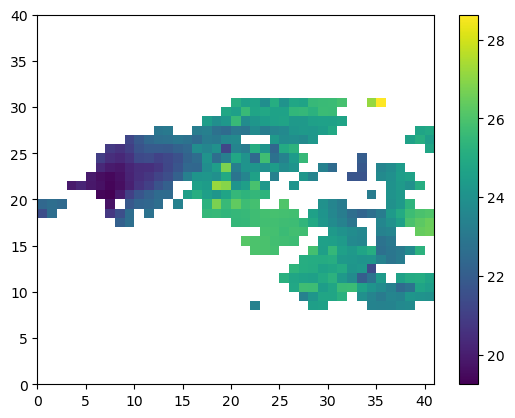

In [7]:
plt.pcolormesh(sst[60,:,:]),plt.colorbar()

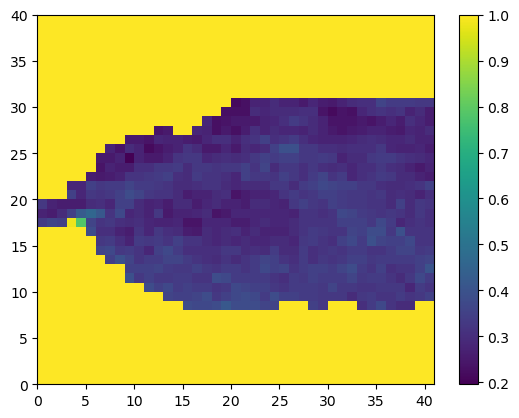

In [8]:
#make mask
plt.pcolormesh(sst.mask.mean(axis=0));plt.colorbar()

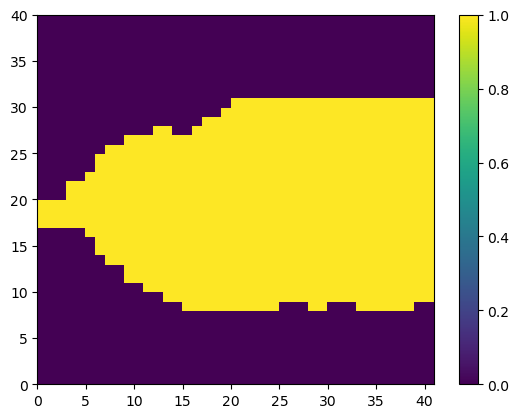

In [9]:
mask = sst.mask.mean(axis=0)<0.98;
plt.pcolor(mask*1.);plt.colorbar()

In [10]:
#write in netcdf file

dsw = Dataset("sst_L3_Alboran_2022_py.nc", "w", format="NETCDF4");
latw = dsw.createDimension("lat", len(lat))
lonw = dsw.createDimension("lon", len(lon))
timew = dsw.createDimension("time", len(time))

latitude = dsw.createVariable("lat","f8",("lat",))
longitude = dsw.createVariable("lon","f8",("lon",))
timet = dsw.createVariable("time","f8",("time",))

temp = dsw.createVariable("SST","f4",("time","lat","lon",),fill_value=-9999)
ncmask = dsw.createVariable("mask","i4",("lat","lon",))

latitude[:] = lat
longitude[:] = lon
timet[:] = time/24/60/60;
temp[:] = sst;
ncmask[:] = mask;

temp.units = "degC"
timet.units = "days since 1981-01-01";

dsw.close();

<hr>
<a href="../../Index.ipynb"><< Index</a>
<br>
<a href="./README.ipynb" target="_blank"><< README</a>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<a href="./02_DINEOF_run_Py.ipynb" target="_blank">Run DINEOF >></a>
<hr>
<a href="https://github.com/wekeo/liege-colloquium-23" target="_blank">View on GitHub</a> | <a href="https://training.eumetsat.int/" target="_blank">EUMETSAT Training</a> | <a href=mailto:ops@eumetsat.int target="_blank">Contact helpdesk for support </a> | <a href=mailto:Copernicus.training@eumetsat.int target="_blank">Contact our training team to collaborate on and reuse this material</a></span></p>